In [155]:
import numpy as np
import pandas as pd
from scipy.stats import gamma
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
DATE = '2020_04_08'
sns.set(style='ticks',font_scale=1.2)

In [156]:
jh = pd.read_csv(f'countermeasures_db_johnshopkins_{DATE}.csv')
db = pd.read_csv(f'countermeasures_features_{DATE}.csv')

In [83]:
Countries = ['United States',
             'Brazil',
             'Denmark',
             'Spain',
             'Italy',
             'Germany',
             'Czechia',
             'Romania',
             'Russia',
             'Nepal',
             'China',
             'Japan',
             'South Korea',
             'Singapore'
             ]

Countries_labels = ['United States',
             'Brazil',
             'Denmark',
             'Spain',
             'Italy',
             'Germany',
             'Czechia',
             'Romania',
             'Russia',
             'Nepal',
             'China*',
             'Japan',
             'South Korea',
             'Singapore'
             ]
cdict = {c:i for i,c in enumerate(Countries)}
rev = {i:c for c,i in cdict.items()}

feats= ['Asymptomatic isolation - blanket',
       'Nonessential business suspension',
       'Gatherings banned',
       'Healthcare specialisation',
       'Phone hotline',
       'Assisting people to stay home',
       'Public cleaning',
       'Social distancing and hygiene advice',
       'School closure',
       'Activity cancellation']

extra = ['Date',
       'Country']

extrajh = extra + ['Confirmed Cases']

In [101]:
def get_deltas(df,cols,extra,countries=Countries):

    jhc = df[df['Country'].isin(countries)][cols+extra]
    jhc[cols] = (jhc[cols]>0).astype(int).diff(periods=len(jhc['Country'].unique())).fillna(0).astype(bool)
    jhc['Country'] = jhc['Country'].apply(lambda x: cdict[x])
    jhc['Date'] = pd.to_datetime(jhc['Date'])
    return jhc

jhc = get_deltas(jh,feats,extrajh)
dbc = get_deltas(db,feats,extra)

In [85]:
get_deltas(db,feats,extra,db['Country'].unique()).sum(0)

Asymptomatic isolation - blanket                                                       31
Nonessential business suspension                                                       43
Gatherings banned                                                                      40
Healthcare specialisation                                                              15
Phone hotline                                                                           5
Assisting people to stay home                                                          17
Public cleaning                                                                         8
Social distancing and hygiene advice                                                   16
School closure                                                                         61
Activity cancellation                                                                  40
Country                                 AustriaGermanyUnited KingdomSouth KoreaSingapo...
dtype: obj

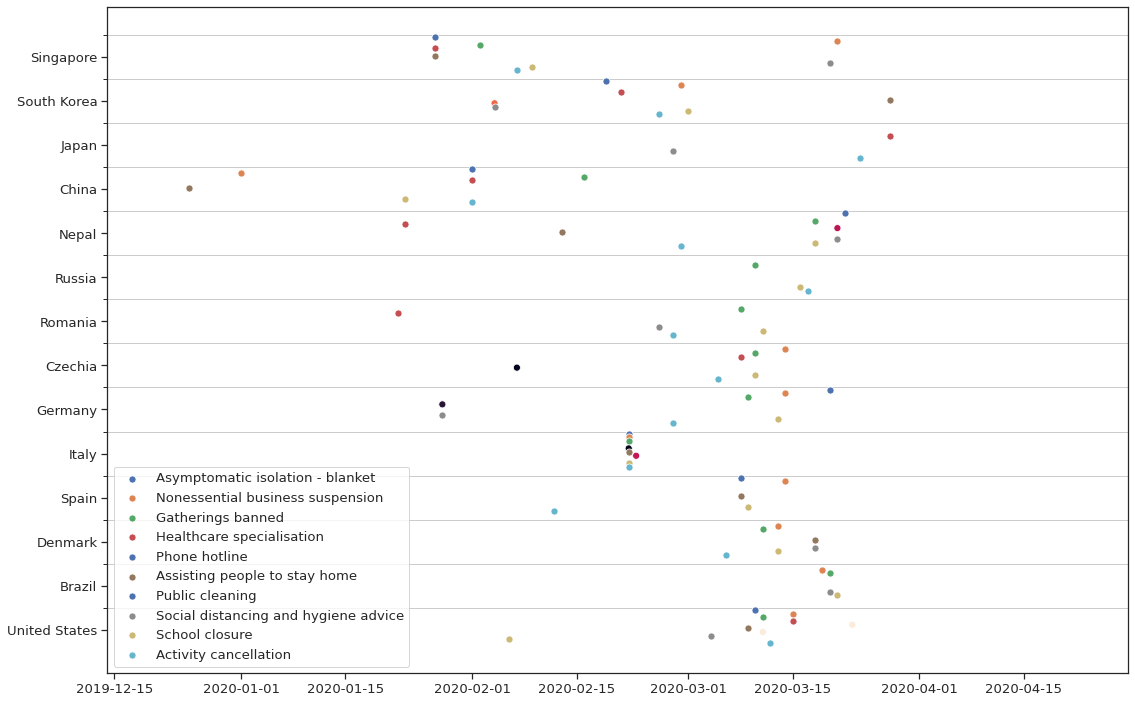

In [102]:
fig,ax=plt.subplots(figsize=(16,10))
for i,col in enumerate(dbc.columns[:10]):
    mask = dbc[col]
    sns.scatterplot(dbc[mask]['Date'],2*dbc[mask]['Country']-i/6+0.9,label=col,ax=ax,s=50)
plt.legend()
ax.set_yticks(np.arange(0,2*len(Countries),2))
ax.set_yticklabels(Countries)
ax.set_xlim([dbc['Date'].min()-pd.Timedelta(days=4),dbc['Date'].max()])
ax.set_yticks(np.arange(1,2*len(Countries)+1,2),minor=True)
ax.grid(which='minor',axis='y')
ax.set_ylabel('')
ax.set_xlabel('')
plt.tight_layout()
# plt.savefig('interventions_by_time.svg')

/home/guest/.local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


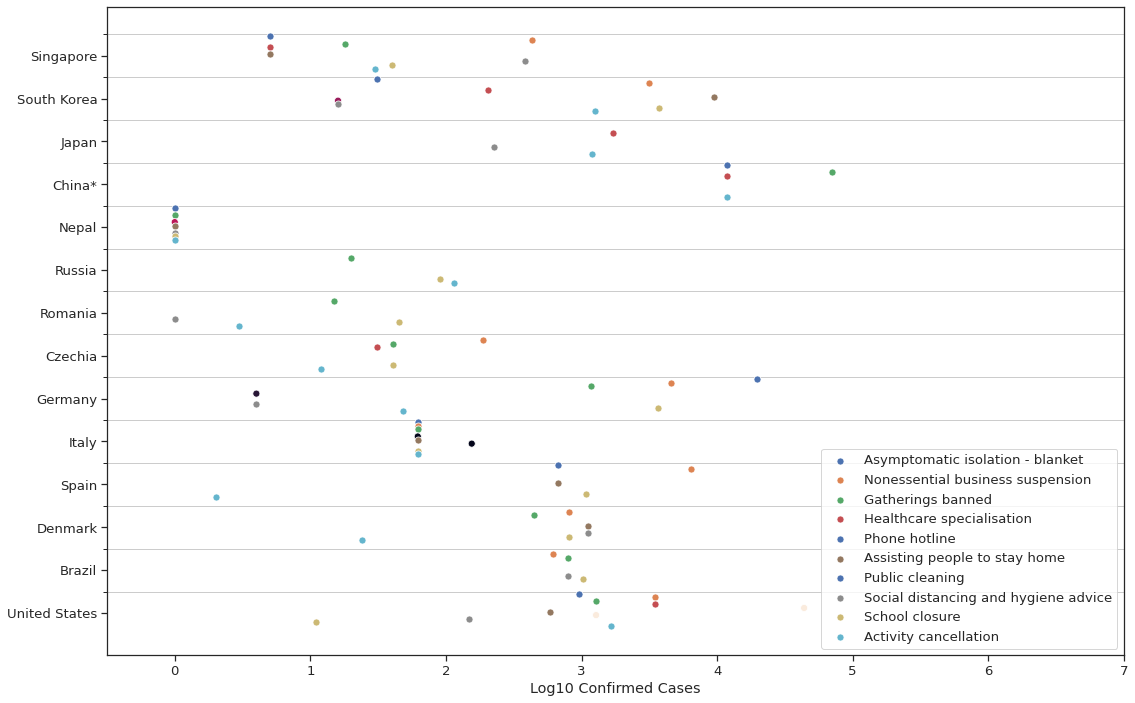

In [103]:
fig,ax=plt.subplots(figsize=(16,10))
for i,col in enumerate(jhc.columns[:10]):
    mask = jhc[col]
    sns.scatterplot(np.log10(jhc[mask]['Confirmed Cases']),2*jhc[mask]['Country']-i/6+0.9,label=col,ax=ax,s=50)
plt.legend(loc='lower right')
ax.set_yticks(np.arange(0,2*len(Countries),2))
ax.set_yticklabels(Countries_labels)
# ax.set_xlim([dbc['Date'].min()-pd.Timedelta(days=4),dbc['Date'].max()])
ax.set_yticks(np.arange(1,2*len(Countries)+1,2),minor=True)
ax.grid(which='minor',axis='y')
ax.set_xlabel('Log10 Confirmed Cases')
ax.set_ylabel('')
ax.set_xlim([-0.5,7])
plt.tight_layout()
# plt.savefig('interventions_by_confirmedcases.png')

In [30]:
jh[jh['Country']=='Nepal']

,Unnamed: 0,Symptomatic isolation - targeted,Symptomatic isolation - blanket,Asymptomatic isolation - targeted,Asymptomatic isolation - blanket,Domestic travel restriction,Nonessential business suspension,International travel restriction,Testing,Contact tracing,...,School closure,Activity cancellation,Resumption,Diagnostic criteria loosened,Diagnostic criteria tightened,Testing criteria,Date,Country,Confirmed Cases,Deaths
60,60,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,0,0,0,0,0,0.0,2020-01-23,Nepal,0,0
136,136,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,0,0,0,0,0,0.0,2020-01-24,Nepal,0,0
212,212,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,0,0,0,0,0,0.0,2020-01-25,Nepal,1,0
288,288,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,0,0,0,0,0,0.0,2020-01-26,Nepal,1,0
364,364,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,0,0,0,0,0,0.0,2020-01-27,Nepal,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5456,5456,NaN,NaN,NaN,2.0,NaN,NaN,6.0,NaN,NaN,...,1,3,0,0,0,0.1,2020-04-03,Nepal,6,0
5532,5532,NaN,NaN,NaN,2.0,NaN,NaN,6.0,NaN,NaN,...,1,3,0,0,0,0.1,2020-04-04,Nepal,9,0
5608,5608,NaN,NaN,NaN,2.0,NaN,NaN,6.0,NaN,NaN,...,1,3,0,0,0,0.1,2020-04-05,Nepal,9,0
5684,5684,NaN,NaN,NaN,2.0,NaN,NaN,6.0,NaN,NaN,...,1,3,0,0,0,0.1,2020-04-06,Nepal,9,0


In [53]:
categories = {
    'Movement restrictions':['Symptomatic isolation - targeted',
                             'Symptomatic isolation - blanket',
                            'Asymptomatic isolation - targeted',
                            'Asymptomatic isolation - blanket',
                            'Domestic travel restriction',
                            'International travel restriction'],
    'Isolation enhancement':['Healthcare specialisation',
                             'Phone hotline',
                             'Assisting people to stay home'],
    'Public hygiene':['Public cleaning',
                      'Miscellaneous hygiene measures',
                      'Social distancing and hygiene advice',
                      'Hygiene supply',
                      'Mask wearing'],
    'Activity cancellation':['Gatherings banned',
                             'Nonessential business suspension',
                             'School closure',
                             'Activity cancellation',
                             'Resumption'],
    'Testing':['Diagnostic criteria loosened',
               'Diagnostic criteria tightened',
               'Testing criteria',
               'Testing',
               'Contact tracing']
}

In [157]:
db0 = db.drop(columns=['Unnamed: 0'])
db0[db0.columns[:-2]] = db0[db0.columns[:-2]].fillna(0).diff(periods=len(db0['Country'].unique()))

In [158]:
counts = dict()

for k, cs in categories.items():
    counts[k] = ((db0[cs]>0)|(db0[cs]<0)).sum().sum()

In [159]:
pd.Series(counts).to_csv('counts.csv')

In [160]:
counts = dict()

for k, cs in categories.items():
    counts[k] = []
    for c in db0['Country'].unique():
        counts[k].append(((db0[db0['Country']==c][cs]>0)|(db0[db0['Country']==c][cs]<0)).sum().sum())

In [161]:
s = pd.DataFrame(counts,index=db0['Country'].unique())
s.to_csv('counts_by_country.csv')

In [162]:
s

,Movement restrictions,Isolation enhancement,Public hygiene,Activity cancellation,Testing
Austria,2,0,0,6,1
Germany,3,1,8,6,1
United Kingdom,3,0,3,1,1
South Korea,5,4,8,5,5
Singapore,7,5,4,8,2
...,...,...,...,...,...
North Cyprus,0,0,3,0,0
Pakistan,0,0,2,0,0
Sri Lanka,0,0,4,0,0
United Arab Emirates,0,0,2,0,0


In [153]:
counts

{'Movement restrictions': [2,
  3,
  3,
  5,
  7,
  2,
  2,
  1,
  1,
  3,
  8,
  2,
  5,
  3,
  6,
  5,
  5,
  3,
  3,
  2,
  1,
  4,
  6,
  0,
  4,
  0,
  0,
  3,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  4,
  1,
  1,
  5,
  2,
  1,
  0,
  3,
  2,
  1,
  3,
  1,
  1,
  3,
  0,
  0,
  2,
  2,
  1,
  1,
  0,
  0,
  0,
  2,
  2,
  4,
  2,
  5,
  1,
  1,
  3,
  1,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'Isolation enhancement': [0,
  1,
  0,
  4,
  5,
  0,
  1,
  1,
  0,
  1,
  6,
  0,
  2,
  1,
  3,
  2,
  2,
  0,
  1,
  2,
  0,
  1,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'Public hygiene': [0,
  8,
  3,
  8,
  4,
  0,
  5,
  1,
  0,
  0,
  6,
  2,
  3,
  4,
  3,
  2,
  5,
  5,
  4,
  5,
  0,
  1,
  2,
  1,
  1,
  0,


In [128]:
db0[db0['Country'].isin(['China'])]['Asymptomatic isolation - blanket'].diff().dropna()

3694     0.0
3774     0.0
3854     0.0
3934     0.0
4014     0.0
        ... 
10334    0.0
10414    0.0
10494    0.0
10574    0.0
10654    0.0
Name: Asymptomatic isolation - blanket, Length: 88, dtype: float64

In [131]:
db0[db0['Country'].isin(['China'])]['Asymptomatic isolation - blanket'].dropna()

3614     3.0
3694     3.0
3774     3.0
3854     3.0
3934     3.0
        ... 
10334    3.0
10414    3.0
10494    3.0
10574    3.0
10654    3.0
Name: Asymptomatic isolation - blanket, Length: 89, dtype: float64